In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
db = pd.read_csv('student/student-por.csv',sep=';')
db.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
db.shape

(649, 33)

In [4]:
db['Final Grade'] = ((db['G1'] + db['G2'] + db['G3'])/3).round(2)

In [5]:
db.describe().round(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Final Grade
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91,11.63
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23,2.83
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.33
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00,11.67
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00,13.33
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00,18.67


In [6]:
print('No variable was strongly correlated with the Final Grade (except the grades that make it up)')
db.corr().round(2)

No variable was strongly correlated with the Final Grade (except the grades that make it up)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Final Grade
age,1.00,-0.11,-0.12,0.03,-0.01,0.32,-0.02,-0.00,0.11,0.13,0.09,-0.01,0.15,-0.17,-0.11,-0.11,-0.13
Medu,-0.11,1.00,0.65,-0.27,0.10,-0.17,0.02,-0.02,0.01,-0.01,-0.02,0.00,-0.01,0.26,0.26,0.24,0.27
Fedu,-0.12,0.65,1.00,-0.21,0.05,-0.17,0.02,0.01,0.03,0.00,0.04,0.04,0.03,0.22,0.23,0.21,0.23
traveltime,0.03,-0.27,-0.21,1.00,-0.06,0.10,-0.01,0.00,0.06,0.09,0.06,-0.05,-0.01,-0.15,-0.15,-0.13,-0.15
studytime,-0.01,0.10,0.05,-0.06,1.00,-0.15,-0.00,-0.07,-0.08,-0.14,-0.21,-0.06,-0.12,0.26,0.24,0.25,0.26
failures,0.32,-0.17,-0.17,0.10,-0.15,1.00,-0.06,0.11,0.05,0.11,0.08,0.04,0.12,-0.38,-0.39,-0.39,-0.41
famrel,-0.02,0.02,0.02,-0.01,-0.00,-0.06,1.00,0.13,0.09,-0.08,-0.09,0.11,-0.09,0.05,0.09,0.06,0.07
freetime,-0.00,-0.02,0.01,0.00,-0.07,0.11,0.13,1.00,0.35,0.11,0.12,0.08,-0.02,-0.09,-0.11,-0.12,-0.11
goout,0.11,0.01,0.03,0.06,-0.08,0.05,0.09,0.35,1.00,0.25,0.39,-0.02,0.09,-0.07,-0.08,-0.09,-0.08
Dalc,0.13,-0.01,0.00,0.09,-0.14,0.11,-0.08,0.11,0.25,1.00,0.62,0.06,0.17,-0.20,-0.19,-0.20,-0.21


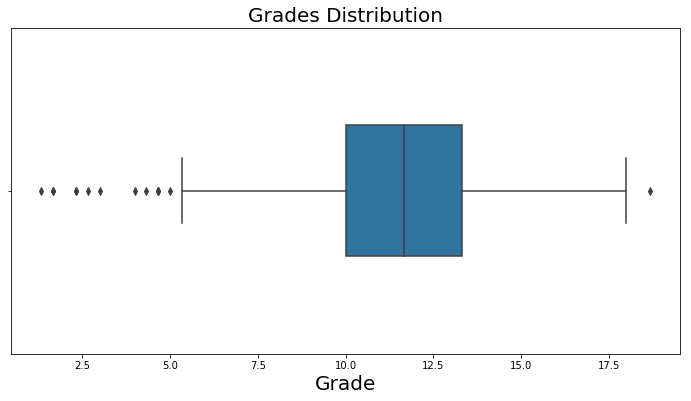

In [7]:
box = sns.boxplot(db['Final Grade'],width=0.4)
box.set_title('Grades Distribution',fontsize=20)
box.set_xlabel("Grade",fontsize=20)
box.figure.set_size_inches(12,6)

In [8]:
print('Removing the botton outliers')
db2 = db[db['Final Grade'] >= 5 ]
print(f'Data Base before transformation {db.shape}')
print(f'Data Base after transformation {db2.shape}')

Removing the botton outliers
Data Base before transformation (649, 34)
Data Base after transformation (637, 34)


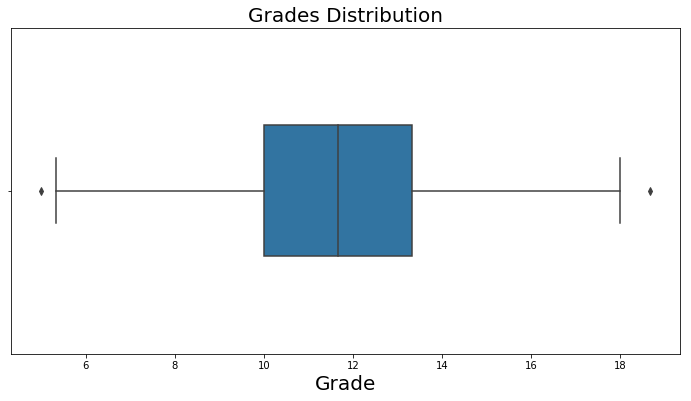

In [9]:
box = sns.boxplot(db2['Final Grade'],width=0.4)
box.set_title('Grades Distribution',fontsize=20)
box.set_xlabel("Grade",fontsize=20)
box.figure.set_size_inches(12,6)

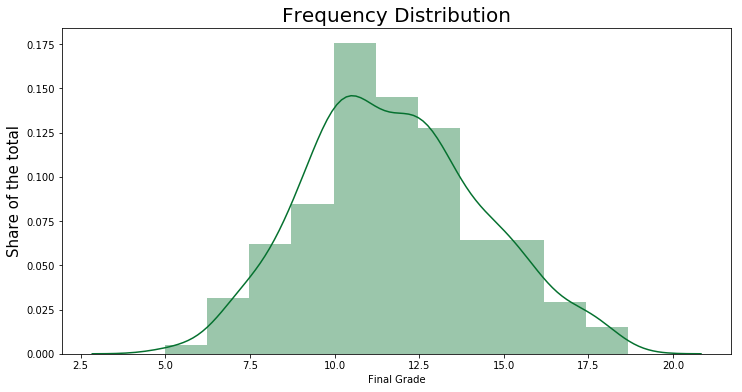

In [10]:
sns.set_palette('BuGn_r')
box = sns.distplot(db2['Final Grade'],bins=11)
box.set_title('Frequency Distribution',fontsize=20)
box.set_ylabel("Share of the total",fontsize=15)
box.figure.set_size_inches(12,6)

Text(0.5, 1.15, 'Dispersion Between Variables with Direction Line')

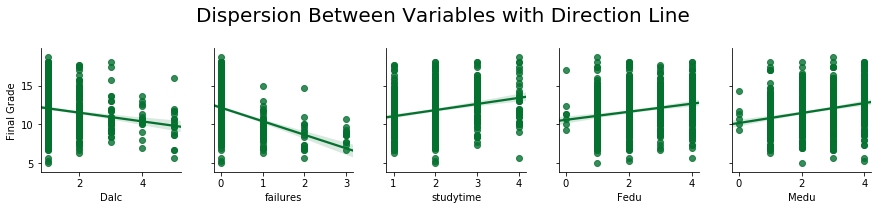

In [11]:
ax = sns.pairplot(db2,y_vars='Final Grade',  x_vars = ['Dalc','failures','studytime','Fedu','Medu'],kind='reg')
ax.fig.suptitle('Dispersion Between Variables with Direction Line', fontsize= 20,y=1.15)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = db2['Final Grade']
x = db2[['Dalc','failures','studytime','Fedu','Medu']]

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
model = LinearRegression(normalize=True)

In [17]:
'''This loop to runs the model several times and return only the randon state that got the best coefficient of determination,
I ran it 100 thousand times and the best was o 88663 com r² de 0.39 '''
r2 = 0
for st in range (0,100000) :
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=st)
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    r = metrics.r2_score(y_test,y_predict).round(3)
    if r2 < r:
        r2 = r
        state = st
print('The best result was :{} from randon state number: {}'.format(r2,state))

The best result was :0.39 from randon state number: 88663


In [18]:
model.predict(X_test[3:4]).round(2)

array([13.04])

In [19]:
dalc = 1.5
fail = 1.5
study = 2.93
medu = 2.51
fedu = 2.31
tests = [[dalc,fail,study,medu,fedu]]
print('Predicted grade:',model.predict(tests)[0].round(2))

Predicted grade: 10.31


In [20]:
print('Regardless of the other variables, average final grade will still be:')
model.intercept_.round(3)

Regardless of the other variables, average final grade will still be:


10.073

In [21]:
x.columns

Index(['Dalc', 'failures', 'studytime', 'Fedu', 'Medu'], dtype='object')

In [22]:
print('\n\tThis dataframe shows how much the final grade increases / decreases when one of the variables is changed by 1 point.')
index = ['Intercept','Dalc','failures','studytime','Fedu','Medu']
pd.DataFrame(data=np.append(model.intercept_,model.coef_),index=index,columns=['Settings']).round(3)


	This dataframe shows how much the final grade increases / decreases when one of the variables is changed by 1 point.


,Settings
Intercept,10.073
Dalc,-0.367
failures,-1.323
studytime,0.480
Fedu,-0.037
Medu,0.632
